<img src = "https://raw.githubusercontent.com/touchaee/touchaee.github.io/master/images/Project-Capstone.png">
<h1 align = center>Where to open a new Thai restaurant in New York?</h1>

## Table of Contents
* [1. Introduction: Business Problem](#introduction)
* [2. Data](#data)
* [3. Methodology](#methodology)
* [4. Analysis](#analysis)
* [5. Results and Discussion](#results)
* [6. Conclusion](#conclusion)

## 1. Introduction: Business Problem <a name="introduction"></a>

Over the last 20 years, Thai restaurants have been one of the fastest-growing dining categories in New York City. Ever since the advent of places specializing in regional cuisines, often presenting recipes not seen here before, the Thai dining scene has been more exciting than ever before. So that now we have the fiery food of Isan in the northeast, the mellower food of Chiang Mai near the Burmese border, oodles of noodles from Sukhothai, the curries of central and southern Thailand, the urban cuisine of Bangkok, and the Malaysian-leaning food of the peninsula. Our newest arrival is the food of the capital’s Chinatown.

But the pandemic has been tough on Thai restaurants, a one-third have closed, mostly as a result of the pandemic. The good news is that new places have arisen to replace them; in fact, Thai has been most prominent in the category of new restaurants, as will be shown in what follows, along with lots of highly recommended old favorites.

This project aims to find a location for the opening of a Thai restaurant in NY, Specifically, this report will be targeted to stakeholders interested in opening any restaurant place like **Thai Restaurant** in **New York City**.

The first task would be to **find the areas lack Thai Restaurants** by analyzing restaurant data from FourSquare API and **shortlisting an area**, where Thai restaurant is not amongst the most common venues.

We will make use of our data science tools to analyze data and focus on the areas and explore its areas and the 10 most common venues in each area so that the best areas where Thai restaurant is not amongst the most common venue can be selected.

## 2. Data <a name="data"></a>

Based on the definition of our problem, the factors that will influence our decision are:
* finding the areas lack Thai Restaurants
* finding the most common venues
* Choosing the right neighborhood within the borough

We will be using the geographical coordinates of NY to plot neighborhoods in a borough that is lack of Thai Restaurant and in the city's vicinity, and finally, cluster our neighborhoods and present our findings.

Following data sources will be needed to extract/generate the required information:

- [**Part 1**: Using a IBM dataset containing the New York Borough, Neighborhood and geometry coordinates](#part1):  A dataset consisting of Borough, Neighborhood, Latitude and Longitude

- [**Part 2**: Gathering Thai Restaurant data for each neighborhood from FoursquareAPI](#part2): Get the venue data that belongs to the neighborhood and borough.

- [**Part 3**: Gathering additional information about the Thai Restaurant for each neighborhood from FoursquareAPI](#part3): Get the additional venue data such as likes, ratings and price.

### Importing all the necessary Libraries

In [1]:
import numpy as np
import pandas as pd

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Importing folium to visualise Maps and plot based on Lat and Lng
import folium

#Requests to request web pages by making get requests to FourSquare REST Client
import requests

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

#Importing itertools for visualize
from itertools import cycle, islice

print('Libraries imported')

Matplotlib version:  3.1.0
Libraries imported


### **Part 1:** Using a IBM dataset containing the New York Borough, Neighborhood and geometry coordinates<a name="part1"></a>


####  New York Dataset

Properties of the New York dataset

*   Borough - Recorded borough
*   Neighborhood - Recorded neighborhood
*   Latitude - Recorded latitude
*   Longitude - Recorded longitude


Data set URL: https://cocl.us/new_york_dataset

In [2]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        # get Borough and Neighborhood
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        # get Latitude and Longitude
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [3]:
df = get_new_york_data()

In [4]:
df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


##### Total Neighborhood in different Borough

In [5]:
df_count_neigh = df.groupby('Borough').count()['Neighborhood'].sort_values(ascending = False).to_frame()

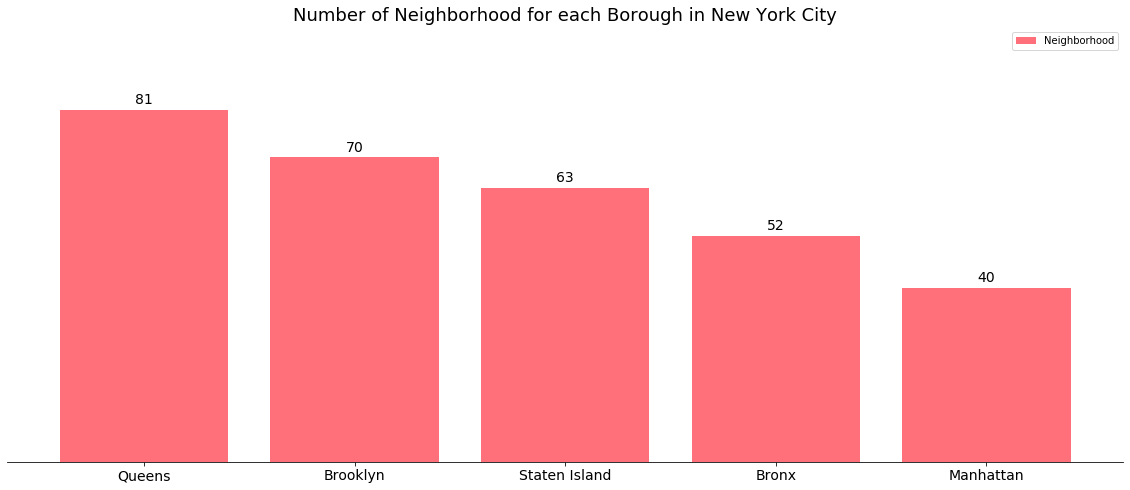

In [6]:
#set ax parameters
figsize = (20, 8)
width = 0.8
title = "Number of Neighborhood for each Borough in New York City"

#Create ax
ax = df_count_neigh.plot(kind = 'bar', figsize = figsize, width = width, color = '#FF707B', rot = 0)
ax.set_ylim(0, 100)

#Text Decoration
ax.set_title(title, fontdict = {'fontsize': 18})
ax.set_xticklabels(df_count_neigh.index, fontdict = {'fontsize': 14})
ax.set_xlabel("")

#Borderless
ax.set_yticklabels("")
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for p in ax.patches:                 
    ax.annotate(
        "{}".format(p.get_height()),
        (p.get_x()+p.get_width()/2., p.get_height()), 
        ha='center',
        va='center', 
        xytext=(0, 10),
        textcoords='offset points', 
        fontsize = 14
    )

'''
#percentage on Movie
plt.annotate('',              # s: str. Will leave it blank for no text
     xy=(0.7, 90),          # place head of the arrow at point (year 2012 , pop 70)
     xytext=(0, 60),      # place base of the arrow at point (year 2008 , pop 20)
     xycoords='data',         # will use the coordinate system of the object being annotated 
     arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#3790E8', lw=4)
    )

plt.annotate(
    'Queens',
    xy = (0.7, 90),
    fontsize= 16
)
'''

plt.show()

We see that Queens has highest numbe\r of neighborhoods

### **Part 2:** Gathering Thai Restaurant data for each neighborhood from FoursquareAPI<a name="part2"></a>

#### Define a function to intract with FourSquare API
get top 200 venues within a radius of 1500 metres for a given latitude and longitude. Below function will return us the venue id , venue name, category, latitude and longitude.

In [3]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=200
    CLIENT_ID = 'RZDYH51XGA4ZLDY3HLI5UWLNWEKUMMLKGYABRT2CGO12XCBZ' # changed my Foursquare ID
    CLIENT_SECRET = '4ZPM33XMBRGDBG4KWJZJ2VS5CXDGYGAVGWJ2QS3QSRDPGLWE' # changed Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_lat = row['venue']['location']['lat']
            venue_lng = row['venue']['location']['lng']
            venue_details.append([venue_id,venue_name,venue_category,venue_lat,venue_lng])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category','Venue_lat','Venue_lng']
    df = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df

#### Define a function to get venue details.

In [4]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'RZDYH51XGA4ZLDY3HLI5UWLNWEKUMMLKGYABRT2CGO12XCBZ' # changed my Foursquare ID
    CLIENT_SECRET = '4ZPM33XMBRGDBG4KWJZJ2VS5CXDGYGAVGWJ2QS3QSRDPGLWE' # changed Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_price_message = venue_data['price']['message']
        venue_price_tier = venue_data['price']['tier']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips,venue_price_message,venue_price_tier])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips','Price_message','Price_tier']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

#### Collect Thai restaurant data for each neighborhood and borough

In [9]:
# prepare neighborhood list that contains Thai resturants
column_names=['Borough', 'Neighborhood', 'ID','Name', 'Category','Venue_lat','Venue_lng']
Thai_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in df.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    Thai_resturants = venues[venues['Category'] == 'Thai Restaurant']   
    print(f'({count}/{len(df)}) Thai Resturants in {Neighborhood}, {Borough} : {str(len(Thai_resturants))}')
    for resturant_detail in Thai_resturants.values.tolist():
        id, name , category, venue_lat, venue_lng = resturant_detail
        Thai_rest_ny = Thai_rest_ny.append({'Borough': Borough,
                                            'Neighborhood': Neighborhood, 
                                            'ID': id,
                                            'Name' : name,
                                            'Category' : category,
                                            'Venue_lat' : venue_lat,
                                            'Venue_lng' : venue_lng
                                               }, ignore_index=True)
    count+=1

done
(1/306) Thai Resturants in Wakefield, Bronx : 0
done
(2/306) Thai Resturants in Co-op City, Bronx : 0
done
(3/306) Thai Resturants in Eastchester, Bronx : 0
done
(4/306) Thai Resturants in Fieldston, Bronx : 0
done
(5/306) Thai Resturants in Riverdale, Bronx : 1
done
(6/306) Thai Resturants in Kingsbridge, Bronx : 1
done
(7/306) Thai Resturants in Marble Hill, Manhattan : 1
done
(8/306) Thai Resturants in Woodlawn, Bronx : 0
done
(9/306) Thai Resturants in Norwood, Bronx : 0
done
(10/306) Thai Resturants in Williamsbridge, Bronx : 0
done
(11/306) Thai Resturants in Baychester, Bronx : 0
done
(12/306) Thai Resturants in Pelham Parkway, Bronx : 0
done
(13/306) Thai Resturants in City Island, Bronx : 0
done
(14/306) Thai Resturants in Bedford Park, Bronx : 0
done
(15/306) Thai Resturants in University Heights, Bronx : 0
done
(16/306) Thai Resturants in Morris Heights, Bronx : 0
done
(17/306) Thai Resturants in Fordham, Bronx : 0
done
(18/306) Thai Resturants in East Tremont, Bronx : 

Save dataframe as csv named _'thai_rest_ny.csv'_

In [10]:
Thai_rest_ny.to_csv('thai_rest_ny.csv')

In [5]:
Thai_rest_ny = pd.read_csv('thai_rest_ny.csv', index_col = 0)

In [6]:
Thai_rest_ny.head()

,Borough,Neighborhood,ID,Name,Category,Venue_lat,Venue_lng
0,Bronx,Riverdale,4b94a4a2f964a520787f34e3,Nam Thai,Thai Restaurant,40.886388,-73.910025
1,Bronx,Kingsbridge,4b94a4a2f964a520787f34e3,Nam Thai,Thai Restaurant,40.886388,-73.910025
2,Manhattan,Marble Hill,4a739e29f964a520f5dc1fe3,Siam Square,Thai Restaurant,40.878796,-73.916701
3,Bronx,Country Club,4b4c90d3f964a52046b626e3,Honey's Thai Pavilion,Thai Restaurant,40.847845,-73.831320
4,Bronx,Parkchester,5585c948498e0bd8a8a706f1,Thai Cuisine,Thai Restaurant,40.838048,-73.863917


In [7]:
print(Thai_rest_ny.shape)

(139, 7)


#### Further Cleaning the data by dropping rows with duplicated data

In [8]:
Thai_rest_ny.drop_duplicates(subset = ['ID'], inplace = True)
Thai_rest_ny.reset_index(inplace = True, drop = True)

In [9]:
Thai_rest_ny.head()

,Borough,Neighborhood,ID,Name,Category,Venue_lat,Venue_lng
0,Bronx,Riverdale,4b94a4a2f964a520787f34e3,Nam Thai,Thai Restaurant,40.886388,-73.910025
1,Manhattan,Marble Hill,4a739e29f964a520f5dc1fe3,Siam Square,Thai Restaurant,40.878796,-73.916701
2,Bronx,Country Club,4b4c90d3f964a52046b626e3,Honey's Thai Pavilion,Thai Restaurant,40.847845,-73.831320
3,Bronx,Parkchester,5585c948498e0bd8a8a706f1,Thai Cuisine,Thai Restaurant,40.838048,-73.863917
4,Bronx,Pelham Bay,57097b8b498e5431176ca914,Tana Thai Restaurant,Thai Restaurant,40.851395,-73.843658


In [10]:
print(Thai_rest_ny.shape)

(99, 7)


We got 99 Thai Resturants across New York City

In [11]:
df_count_res_borough = Thai_rest_ny.groupby('Borough').count()['ID'].sort_values(ascending = False).to_frame()

In [12]:
df_count_res_neighborhood = Thai_rest_ny.groupby('Neighborhood').count()['ID'].sort_values(ascending = False)[0:5].to_frame()

<Figure size 432x288 with 0 Axes>

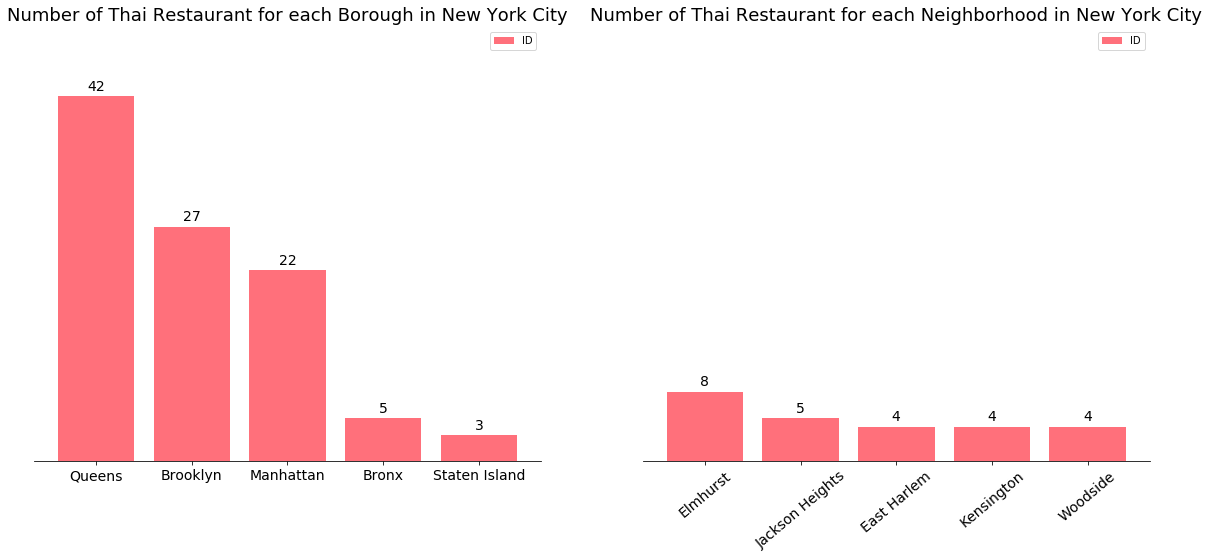

In [13]:
#set ax parameters
figsize = (20, 8)
width = 0.8
title = "Number of Thai Restaurant for each Borough in New York City"

plt.clf()
fig, axes = plt.subplots(nrows=1, ncols=2)

#Plot Borough
#Create ax
ax = df_count_res_borough.plot(kind = 'bar', figsize = figsize, width = width, color = '#FF707B', rot = 0, ax = axes[0])
ax.set_ylim(0, 50)

#Text Decoration
ax.set_title(title, fontdict = {'fontsize': 18})
ax.set_xticklabels(df_count_res_borough.index, fontdict = {'fontsize': 14})
ax.set_xlabel("")

#Borderless
ax.set_yticklabels("")
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for p in ax.patches:                 
    ax.annotate(
        "{}".format(p.get_height()),
        (p.get_x()+p.get_width()/2., p.get_height()), 
        ha='center',
        va='center', 
        xytext=(0, 10),
        textcoords='offset points', 
        fontsize = 14
    )

#Plot Neighborhood   
title = "Number of Thai Restaurant for each Neighborhood in New York City"    
#Create ax
ax = df_count_res_neighborhood.plot(kind = 'bar', figsize = figsize, width = width, color = '#FF707B', rot = 40, ax = axes[1])
ax.set_ylim(0, 50)

#Text Decoration
ax.set_title(title, fontdict = {'fontsize': 18})
ax.set_xticklabels(df_count_res_neighborhood.index, fontdict = {'fontsize': 14})
ax.set_xlabel("")

#Borderless
ax.set_yticklabels("")
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for p in ax.patches:                 
    ax.annotate(
        "{}".format(p.get_height()),
        (p.get_x()+p.get_width()/2., p.get_height()), 
        ha='center',
        va='center', 
        xytext=(0, 10),
        textcoords='offset points', 
        fontsize = 14
    )

plt.show()

we see that **Queens** has the most number of Thai restaurants and **Elmgurst Neighborhood** also has the most Thai restaurants.

### **Part 3:** Gathering additional information about the Thai Restaurant for each neighborhood from FoursquareAPI<a name="part3"></a>

In [74]:
# prepare neighborhood list that contains Thai resturants
column_names=['Borough', 'Neighborhood', 'ID', 'Name', 'Venue_lat', 'Venue_lng', 'Likes', 'Rating', 'Tips', 'Price_message', 'Price_tier']
Thai_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in Thai_rest_ny.values.tolist():
    Borough, Neighborhood, ID, Name, Category, Venue_lat, Venue_lng = row
    try:
        venue_details = get_venue_details(ID)
        print(venue_details)
        id, name, likes, rating, tips, price_message, price_tier = venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print(f'({count}/{len(Thai_rest_ny)}), done')
    Thai_rest_stats_ny = Thai_rest_stats_ny.append({'Borough': Borough,
                                                    'Neighborhood': Neighborhood, 
                                                    'ID': id,
                                                    'Name' : name,
                                                    'Venue_lat' : Venue_lat,
                                                    'Venue_lng' : Venue_lng,
                                                    'Likes' : likes,
                                                    'Rating' : rating,
                                                    'Tips' : tips,
                                                    'Price_message': price_message,
                                                    'Price_tier': price_tier
                                                   }, ignore_index=True)
    count+=1

                         ID      Name  Likes  Rating  Tips Price_message  \
0  4b94a4a2f964a520787f34e3  Nam Thai      3     7.1     5      Moderate   

   Price_tier  
0           2  
(1/99), done
                         ID         Name  Likes  Rating  Tips Price_message  \
0  4a739e29f964a520f5dc1fe3  Siam Square     15     7.3    13      Moderate   

   Price_tier  
0           2  
(2/99), done
                         ID                   Name  Likes  Rating  Tips  \
0  4b4c90d3f964a52046b626e3  Honey's Thai Pavilion     19     7.3    27   

  Price_message  Price_tier  
0         Cheap           1  
(3/99), done
                         ID          Name  Likes  Rating  Tips Price_message  \
0  5585c948498e0bd8a8a706f1  Thai Cuisine     17     7.2     1      Moderate   

   Price_tier  
0           2  
(4/99), done
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips, Price_message, Price_tier]
Index: []
No data available for id= 57097b8b498e5431176ca914
(5/99), done
Empty Data

In [75]:
Thai_rest_stats_ny.to_csv('thai_rest_stats_ny.csv')

In [14]:
Thai_rest_stats_ny = pd.read_csv('thai_rest_stats_ny.csv', index_col = 0)

In [15]:
Thai_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Venue_lat,Venue_lng,Likes,Rating,Tips,Price_message,Price_tier
0,Bronx,Riverdale,4b94a4a2f964a520787f34e3,Nam Thai,40.886388,-73.910025,3,7.1,5,Moderate,2
1,Manhattan,Marble Hill,4a739e29f964a520f5dc1fe3,Siam Square,40.878796,-73.916701,15,7.3,13,Moderate,2
2,Bronx,Country Club,4b4c90d3f964a52046b626e3,Honey's Thai Pavilion,40.847845,-73.831320,19,7.3,27,Cheap,1
3,Bronx,Parkchester,5585c948498e0bd8a8a706f1,Thai Cuisine,40.838048,-73.863917,17,7.2,1,Moderate,2
4,Bronx,Pelham Bay,0,0,40.851395,-73.843658,0,0.0,0,Moderate,2


In [16]:
Thai_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Borough        99 non-null     object 
 1   Neighborhood   99 non-null     object 
 2   ID             99 non-null     object 
 3   Name           99 non-null     object 
 4   Venue_lat      99 non-null     float64
 5   Venue_lng      99 non-null     float64
 6   Likes          99 non-null     int64  
 7   Rating         99 non-null     float64
 8   Tips           99 non-null     int64  
 9   Price_message  99 non-null     object 
 10  Price_tier     99 non-null     int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 9.3+ KB


In [17]:
Thai_rest_stats_ny[Thai_rest_stats_ny.ID == '0'].shape[0]

6

There is 6 restauratants that I cannot retrieve additional information

Let's drop that 6 rows

In [18]:
Thai_rest_stats_ny.drop(Thai_rest_stats_ny.loc[Thai_rest_stats_ny['ID'] == '0'].index, inplace=True)

#### Convert object columns into float for further analysis

In [19]:
Thai_rest_stats_ny['Likes'] = Thai_rest_stats_ny['Likes'].astype('float64')
Thai_rest_stats_ny['Rating'] = Thai_rest_stats_ny['Rating'].astype('float64')
Thai_rest_stats_ny['Tips'] = Thai_rest_stats_ny['Tips'].astype('float64')
Thai_rest_stats_ny['Price_tier'] = Thai_rest_stats_ny['Price_tier'].astype('float64')
Thai_rest_stats_ny.describe()

,Venue_lat,Venue_lng,Likes,Rating,Tips,Price_tier
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,40.730355,-73.931024,98.763441,8.078495,35.849462,1.913978
std,0.056323,0.070761,153.280816,0.742916,54.916131,0.350649
min,40.590823,-74.157463,3.000000,6.200000,1.000000,1.000000
25%,40.692654,-73.976934,16.000000,7.600000,6.000000,2.000000
50%,40.742850,-73.944202,31.000000,8.200000,12.000000,2.000000
75%,40.761291,-73.887552,87.000000,8.600000,34.000000,2.000000
max,40.886388,-73.721676,766.000000,9.400000,358.000000,3.000000


In [66]:
Thai_rest_stats_ny[['ID', 'Venue_lat', 'Venue_lng']]

,ID,Venue_lat,Venue_lng
0,4b94a4a2f964a520787f34e3,40.886388,-73.910025
1,4a739e29f964a520f5dc1fe3,40.878796,-73.916701
2,4b4c90d3f964a52046b626e3,40.847845,-73.831320
3,5585c948498e0bd8a8a706f1,40.838048,-73.863917
6,50e8d45ae4b06202fbe39b08,40.623236,-74.028173
...,...,...,...
94,57c169e3498e784947e307aa,40.725861,-73.992533
95,4afca7e0f964a520d02422e3,40.757275,-73.968541
96,49cfd074f964a520ce5a1fe3,40.743142,-73.954021
97,57e83df3498eebbe238cb36f,40.739118,-73.990579


### **Part 3:** Gathering additional information about the **Nearby** Venues for each Thai Restaurant from FoursquareAPI<a name="part3"></a>

In [71]:
def get_nearby_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=50
    CLIENT_ID = 'RZDYH51XGA4ZLDY3HLI5UWLNWEKUMMLKGYABRT2CGO12XCBZ' # changed my Foursquare ID
    CLIENT_SECRET = '4ZPM33XMBRGDBG4KWJZJ2VS5CXDGYGAVGWJ2QS3QSRDPGLWE' # changed Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df

#### Collect Nearby restaurant data.

In [77]:
# prepare Thai restaurant data list that contains Thai resturants
column_names=['Thai_res_id', 'ID','Name', 'Category']
nearby_thai_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in Thai_rest_stats_ny[['ID', 'Name', 'Venue_lat', 'Venue_lng']].values.tolist():
    thai_res_id, name, Latitude, Longitude = row
    venues = get_nearby_venues(Latitude, Longitude)
    nearby_restaurant = venues[venues['ID'] != thai_res_id]   
    print(f'({count}/{len(Thai_rest_stats_ny)}) Nearby restaurant {name}: {str(len(nearby_restaurant))}')
    for resturant_detail in nearby_restaurant.values.tolist():
        id, name, category = resturant_detail
        nearby_thai_rest_ny = nearby_thai_rest_ny.append({
                                                        'Thai_res_id' : thai_res_id,
                                                        'ID': id,
                                                        'Name' : name,
                                                        'Category' : category
                                                           }, ignore_index=True)
    count+=1

done
(1/93) Nearby restaurant Nam Thai: 49
done
(2/93) Nearby restaurant Siam Square: 49
done
(3/93) Nearby restaurant Honey's Thai Pavilion: 49
done
(4/93) Nearby restaurant Thai Cuisine: 49
done
(5/93) Nearby restaurant Top Thai: 50
done
(6/93) Nearby restaurant Mai Thai: 49
done
(7/93) Nearby restaurant Mondayoff By Plant Love House: 49
done
(8/93) Nearby restaurant Ruammit Thai: 49
done
(9/93) Nearby restaurant Sawasde Thai Cooking: 49
done
(10/93) Nearby restaurant Thai Farm Kitchen: 49
done
(11/93) Nearby restaurant To Be Thai: 49
done
(12/93) Nearby restaurant AM Thai Bistro: 49
done
(13/93) Nearby restaurant Jai Dee Thai Restaurant: 50
done
(14/93) Nearby restaurant LOOK by Plant Love House: 49
done
(15/93) Nearby restaurant Muse: 49
done
(16/93) Nearby restaurant Nourish Thai Food Oasis: 49
done
(17/93) Nearby restaurant Noods n’ Chill: 49
done
(18/93) Nearby restaurant Klom Klorm: 49
done
(19/93) Nearby restaurant Lantern Thai Kitchen: 49
done
(20/93) Nearby restaurant Pinto:

In [79]:
nearby_thai_rest_ny.head()

,ID,Name,Category,Thai_res_id
0,503cfaffe4b066d39de5005a,Aoyu Japanese Restaurant,Japanese Restaurant,4b94a4a2f964a520787f34e3
1,4b7993cbf964a520c8022fe3,Liebman's Kosher Deli,Deli / Bodega,4b94a4a2f964a520787f34e3
2,590e5d2ce96d0c61de2dcf1d,Cocina Chente,Mexican Restaurant,4b94a4a2f964a520787f34e3
3,4b0b311af964a520642e23e3,Palace of Japan,Japanese Restaurant,4b94a4a2f964a520787f34e3
4,4f653ac0e4b0bf1012abaf2d,Tin Marin,Tapas Restaurant,4b94a4a2f964a520787f34e3


#### Pivoting the table to better understand the data by crimes per borough

In [136]:
nearby_thai_rest_ny.groupby(['Thai_res_id', 'Category']).count()['Name'].sort_values(ascending = False)

nearby_thai_rest_cat = pd.pivot_table(nearby_thai_rest_ny,
                               values=['Name'],
                               index=['Thai_res_id'],
                               columns=['Category'],
                               aggfunc=len,
                               fill_value=0)

nearby_thai_rest_cat

Name                     \
Category                 Afghan Restaurant African Restaurant   
Thai_res_id                                                     
3fd66200f964a5204ef11ee3                 0                  0   
4112ca00f964a520ed0b1fe3                 0                  0   
42951180f964a52045241fe3                 0                  0   
453f6ce3f964a520353c1fe3                 0                  0   
457d4c15f964a5201a3f1fe3                 0                  0   
...                                    ...                ...   
5d4f31a92ada380008a49b7f                 0                  0   
5dd9e8cf2e6b8600081ec98d                 0                  0   
5df175e82276e2000744dc8b                 0                  0   
5e46e2ec5791a10008c55728                 0                  0   
5ee66a36459579000887cd2b                 0                  0   

                                                                          \
Category                 American Restaurant Animal Shelter Antique Shop   
Thai_res_id                                                                
3fd66200f964a5204ef11ee3                   3              0            0   
4112ca00f964a520ed0b1fe3                   1              0            0   
42951180f964a52045241fe3                   3              0            0   
453f6ce3f964a520353c1fe3                   2              0            0   
457d4c15f964a5201a3f1fe3                   0              0            0   
...                                      ...            ...          ...   
5d4f31a92ada380008a49b7f                   2              0            0   
5dd9e8cf2e6b8600081ec98d                   0              0            1   
5df175e82276e2000744dc8b                   1              0            0   
5e46e2ec5791a10008c55728                   0              0            0   
5ee66a36459579000887cd2b                   0              0            0   

                                                                         \
Category                 Arcade Arepa Restaurant Argentinian Restaurant   
Thai_res_id                                                               
3fd66200f964a5204ef11ee3      0                1                      0   
4112ca00f964a520ed0b1fe3      0                0                      0   
42951180f964a52045241fe3      0                0                      0   
453f6ce3f964a520353c1fe3      0                0                      0   
457d4c15f964a5201a3f1fe3      0                0                      0   
...                         ...              ...                    ...   
5d4f31a92ada380008a49b7f      0                0                      0   
5dd9e8cf2e6b8600081ec98d      0                0                      0   
5df175e82276e2000744dc8b      0                1                      0   
5e46e2ec5791a10008c55728      0                0                      0   
5ee66a36459579000887cd2b      0                0                      0   

                                                 ...                   \
Category                 Art Gallery Art Museum  ... Video Game Store   
Thai_res_id                                      ...                    
3fd66200f964a5204ef11ee3           0          0  ...                0   
4112ca00f964a520ed0b1fe3           0          0  ...                0   
42951180f964a52045241fe3           0          0  ...                0   
453f6ce3f964a520353c1fe3           0          0  ...                0   
457d4c15f964a5201a3f1fe3           0          0  ...                0   
...                              ...        ...  ...              ...   
5d4f31a92ada380008a49b7f           0          0  ...                0   
5dd9e8cf2e6b8600081ec98d           1          0  ...                0   
5df175e82276e2000744dc8b           1          0  ...                0   
5e46e2ec5791a10008c55728           0          0  ...                0   
5ee66a36459579000887cd2b           0          0  ...          

#### One Hot Encoding to Analyze Each Restaurant

In [141]:
# one hot encoding
nyc_onehot = pd.get_dummies(nearby_thai_rest_ny[['Category']], prefix="", prefix_sep="")

# add restaurant column back to dataframe
nyc_onehot['Thai_res_id'] = nearby_thai_rest_ny['Thai_res_id'] 

# move restaurant column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

nyc_onehot.head()

,Thai_res_id,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,4b94a4a2f964a520787f34e3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4b94a4a2f964a520787f34e3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4b94a4a2f964a520787f34e3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4b94a4a2f964a520787f34e3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4b94a4a2f964a520787f34e3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
nyc_grouped = nyc_onehot.groupby('Thai_res_id').mean().reset_index()
nyc_grouped

,Thai_res_id,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,3fd66200f964a5204ef11ee3,0.0,0.0,0.061224,0.0,0.000000,0.0,0.020408,0.0,0.000000,...,0.0,0.0,0.020408,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,4112ca00f964a520ed0b1fe3,0.0,0.0,0.020408,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.020408,0.0,0.0,0.020408,0.020408,0.000000,0.000000,0.000000
2,42951180f964a52045241fe3,0.0,0.0,0.061224,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.040816,0.020408,0.000000,0.000000,0.040816
3,453f6ce3f964a520353c1fe3,0.0,0.0,0.040816,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.020408,0.020408,0.020408,0.000000,0.020408
4,457d4c15f964a5201a3f1fe3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.020408,0.020408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,5d4f31a92ada380008a49b7f,0.0,0.0,0.040816,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.020408,0.000000,0.000000,0.020408
89,5dd9e8cf2e6b8600081ec98d,0.0,0.0,0.000000,0.0,0.020408,0.0,0.000000,0.0,0.020408,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.061224,0.000000,0.000000,0.000000
90,5df175e82276e2000744dc8b,0.0,0.0,0.020408,0.0,0.000000,0.0,0.020408,0.0,0.020408,...,0.0,0.0,0.000000,0.0,0.0,0.061224,0.000000,0.000000,0.000000,0.040816
91,5e46e2ec5791a10008c55728,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.040816,0.020408,0.000000,0.020408,0.020408


#### Let's print each restaurant along with the top 3 most common venues

In [146]:
num_top_venues = 3

for res in nyc_grouped['Thai_res_id']:
    print("----"+res+"----")
    temp = nyc_grouped[nyc_grouped['Thai_res_id'] == res].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----3fd66200f964a5204ef11ee3----
               venue  freq
0  Indian Restaurant  0.14
1         Food Truck  0.10
2             Bakery  0.10


----4112ca00f964a520ed0b1fe3----
          venue  freq
0        Bakery  0.10
1  Cocktail Bar  0.08
2    Bagel Shop  0.06


----42951180f964a52045241fe3----
                 venue  freq
0  American Restaurant  0.06
1          Coffee Shop  0.06
2       Ice Cream Shop  0.06


----453f6ce3f964a520353c1fe3----
                 venue  freq
0          Coffee Shop  0.06
1  American Restaurant  0.04
2                  Bar  0.04


----457d4c15f964a5201a3f1fe3----
              venue  freq
0  Greek Restaurant  0.08
1     Deli / Bodega  0.08
2  Sushi Restaurant  0.06


----46b1ef0df964a520a0491fe3----
         venue  freq
0       Bakery  0.08
1   Boxing Gym  0.04
2  Pizza Place  0.04


----476f8da1f964a520044d1fe3----
         venue  freq
0  Yoga Studio  0.08
1         Pier  0.04
2          Gym  0.04


----49cfd074f964a520ce5a1fe3----
                 venue

#### Now let's create the new dataframe and display the top 10 nearby venues for each restaurant.

First, let's write a function to sort the venues in descending order.

In [147]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [149]:
num_top_venues = 10

#for column such as 1st 2nd 3rd 4th ...
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Thai_res_id']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nearby_venues_sorted = pd.DataFrame(columns=columns)
nearby_venues_sorted['Thai_res_id'] = nyc_grouped['Thai_res_id']

for ind in np.arange(nyc_grouped.shape[0]):
    nearby_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

nearby_venues_sorted.head()

,Thai_res_id,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3fd66200f964a5204ef11ee3,Indian Restaurant,Food Truck,Bakery,American Restaurant,Filipino Restaurant,Grocery Store,Thai Restaurant,Tibetan Restaurant,Pub,Chinese Restaurant
1,4112ca00f964a520ed0b1fe3,Bakery,Cocktail Bar,Bagel Shop,Coffee Shop,Optical Shop,Grocery Store,Bar,Gift Shop,Kitchen Supply Store,Cosmetics Shop
2,42951180f964a52045241fe3,Ice Cream Shop,Coffee Shop,American Restaurant,Yoga Studio,Gym,Bar,Bakery,Indian Restaurant,Café,Pizza Place
3,453f6ce3f964a520353c1fe3,Coffee Shop,Bar,Park,American Restaurant,Bakery,Caribbean Restaurant,Pub,Cocktail Bar,Seafood Restaurant,Yoga Studio
4,457d4c15f964a5201a3f1fe3,Deli / Bodega,Greek Restaurant,Sushi Restaurant,Bakery,Bagel Shop,Italian Restaurant,Bar,Speakeasy,Massage Studio,Brazilian Restaurant


### **Part 4**: Creating a new consolidated dataset of the IBM New York Dataset, along with their thai restaurant, restaurant detail and the nearby restaruants.<a name="part4"></a> 

In [210]:
thai_res_nyc_merged = Thai_rest_stats_ny

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
thai_res_nyc_merged = thai_res_nyc_merged.merge(nearby_venues_sorted, left_on = 'ID', right_on = 'Thai_res_id')

#order columns
cols_name = thai_res_nyc_merged.columns.to_list()
cols_order = [2, 3, 0, 1]
cols_order.extend(range(4, thai_res_nyc_merged.shape[1]))
cols_name[:] = [cols_name[i] for i in cols_order]
thai_res_nyc_merged = thai_res_nyc_merged[cols_name]
thai_res_nyc_merged.drop(columns = ['Thai_res_id'], inplace = True)

thai_res_nyc_merged.head() # check the last columns!

,ID,Name,Borough,Neighborhood,Venue_lat,Venue_lng,Likes,Rating,Tips,Price_message,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4b94a4a2f964a520787f34e3,Nam Thai,Bronx,Riverdale,40.886388,-73.910025,3.0,7.1,5.0,Moderate,...,Pizza Place,Mexican Restaurant,Diner,Bar,Japanese Restaurant,Bagel Shop,Burger Joint,Sandwich Place,Coffee Shop,Bank
1,4a739e29f964a520f5dc1fe3,Siam Square,Manhattan,Marble Hill,40.878796,-73.916701,15.0,7.3,13.0,Moderate,...,Donut Shop,Coffee Shop,Pizza Place,Park,Sandwich Place,Café,Wine Shop,Gym,Mexican Restaurant,Deli / Bodega
2,4b4c90d3f964a52046b626e3,Honey's Thai Pavilion,Bronx,Country Club,40.847845,-73.831320,19.0,7.3,27.0,Cheap,...,Italian Restaurant,Bank,Convenience Store,Sandwich Place,Bakery,Pizza Place,Pharmacy,Dive Bar,Gym,Donut Shop
3,5585c948498e0bd8a8a706f1,Thai Cuisine,Bronx,Parkchester,40.838048,-73.863917,17.0,7.2,1.0,Moderate,...,Pizza Place,Donut Shop,American Restaurant,Latin American Restaurant,Mobile Phone Shop,Supermarket,Coffee Shop,Kids Store,Bar,Bank
4,50e8d45ae4b06202fbe39b08,Top Thai,Brooklyn,Bay Ridge,40.623236,-74.028173,14.0,7.2,11.0,Moderate,...,Spa,Pizza Place,Cosmetics Shop,Middle Eastern Restaurant,Greek Restaurant,Bakery,Japanese Restaurant,Italian Restaurant,Tea Room,Taco Place


## 3. Methodology<a name="methodology"></a>

Categorized the methodologysection into two parts:

- [**Exploratory Data Analysis**:](#eda) Visualise the restuarants repots in different New York boroughs to idenity where is the best place to open Thai restuarant. 


- [**Modelling**:](#mdl) To help stakeholders choose the right neighborhood within a borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use K-Means clustering to address this problem so as to group data based on existing venues which will help in the decision making process.

###  Exploratory Data Analysis<a name="eda"></a>

In [211]:
thai_res_nyc_merged.head()

,ID,Name,Borough,Neighborhood,Venue_lat,Venue_lng,Likes,Rating,Tips,Price_message,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4b94a4a2f964a520787f34e3,Nam Thai,Bronx,Riverdale,40.886388,-73.910025,3.0,7.1,5.0,Moderate,...,Pizza Place,Mexican Restaurant,Diner,Bar,Japanese Restaurant,Bagel Shop,Burger Joint,Sandwich Place,Coffee Shop,Bank
1,4a739e29f964a520f5dc1fe3,Siam Square,Manhattan,Marble Hill,40.878796,-73.916701,15.0,7.3,13.0,Moderate,...,Donut Shop,Coffee Shop,Pizza Place,Park,Sandwich Place,Café,Wine Shop,Gym,Mexican Restaurant,Deli / Bodega
2,4b4c90d3f964a52046b626e3,Honey's Thai Pavilion,Bronx,Country Club,40.847845,-73.831320,19.0,7.3,27.0,Cheap,...,Italian Restaurant,Bank,Convenience Store,Sandwich Place,Bakery,Pizza Place,Pharmacy,Dive Bar,Gym,Donut Shop
3,5585c948498e0bd8a8a706f1,Thai Cuisine,Bronx,Parkchester,40.838048,-73.863917,17.0,7.2,1.0,Moderate,...,Pizza Place,Donut Shop,American Restaurant,Latin American Restaurant,Mobile Phone Shop,Supermarket,Coffee Shop,Kids Store,Bar,Bank
4,50e8d45ae4b06202fbe39b08,Top Thai,Brooklyn,Bay Ridge,40.623236,-74.028173,14.0,7.2,11.0,Moderate,...,Spa,Pizza Place,Cosmetics Shop,Middle Eastern Restaurant,Greek Restaurant,Bakery,Japanese Restaurant,Italian Restaurant,Tea Room,Taco Place


In [188]:
from folium import plugins


# create map and display it
thai_rest_ny_map = folium.Map(location=[40.71306007524032, -73.94420151920066], zoom_start=11)


# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(thai_rest_ny_map)

# loop through the 100 crimes and add each to the map
for lat, lng, rating, price_message  in zip(thai_res_nyc_merged.Venue_lat, thai_res_nyc_merged.Venue_lng, thai_res_nyc_merged.Rating, thai_res_nyc_merged.Price_message):
    label = f'{lat}<br>{lng}<br>rating: {rating}<br>price:  {price_message}'
    folium.features.CircleMarker(
        [lat, lng],
        radius=7, # define how big you want the circle markers to be
        color='white',
        fill=True,
        popup=label,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(incidents)
    
ls = folium.PolyLine([[40.74,-74.00],[40.74,-73.97],[40.77,-73.97],[40.77,-74.00],[40.74,-74.00]], color='red')
ls.add_child(folium.Popup("outline Popup on Polyline"))
ls.add_to(thai_rest_ny_map)

# show map
thai_rest_ny_map

As you can see the area I've highlighted. This is the area that lacks Thai restaurants

In [177]:
thai_res_nyc_merged.groupby(['Borough', 'Neighborhood'])[['Likes', 'Rating', 'Tips', 'Price_tier']].mean()

Likes    Rating        Tips  \
Borough       Neighborhood                                                  
Bronx         Country Club                19.000000  7.300000   27.000000   
              Parkchester                 17.000000  7.200000    1.000000   
              Riverdale                    3.000000  7.100000    5.000000   
Brooklyn      Bay Ridge                   14.000000  7.200000   11.000000   
              Brooklyn Heights           101.500000  7.650000   45.000000   
              Bushwick                    66.000000  8.700000   14.000000   
              Carroll Gardens            165.000000  8.500000   43.000000   
              Clinton Hill                51.000000  8.000000   38.000000   
              Cobble Hill                317.000000  8.200000  160.000000   
              Crown Heights               26.000000  8.500000    6.000000   
              Downtown                    42.000000  9.100000    7.000000   
              East Williamsburg          512.000000  8.700000  124.000000   
              Flatbush                    24.000000  7.500000   10.000000   
              Fort Greene                 42.000000  8.450000   16.000000   
              Kensington                  42.000000  8.300000   21.750000   
              Park Slope                 229.000000  8.100000  122.000000   
              Prospect Heights            91.000000  8.066667   22.000000   
              Prospect Lefferts Gardens   14.000000  9.000000    7.000000   
              Red Hook                    11.000000  8.400000    1.000000   
              Sunset Park                 10.000000  6.600000    9.000000   
              Williamsburg                26.000000  8.400000    6.000000   
              Windsor Terrace             23.000000  7.500000    4.000000   
Manhattan     Chinatown                   98.000000  9.350000   19.500000   
              Clinton                    547.000000  8.100000  145.000000   
              East Harlem                 11.750000  7.750000    5.250000   
              Flatiron                   427.000000  9.100000   72.000000   
              Gramercy                    22.000000  8.800000    8.500000   
              Lenox Hill                 637.000000  9.200000  163.000000   
              Manhattan Valley           213.500000  7.850000   64.500000   
              Marble Hill                 15.000000  7.300000   13.000000   
              Murray Hill                 80.000000  8.400000   31.000000   
              Noho                       448.000000  9.400000  122.000000   
              Sutton Place               387.000000  8.200000  166.000000   
              Upper East Side             88.000000  8.900000   24.000000   
              Upper West Side            201.000000  8.050000   85.000000   
              Washington Heights           7.000000  6.800000    2.000000   
              Yorkville                   27.000000  8.900000    8.000000   
Queens        Arverne                     15.000000  7.000000   11.000000   
              Astoria                     93.500000  8.500000   33.000000   
              Auburndale                   9.000000  6.500000    3.000000   
              Bayside                     31.000000  7.300000   11.500000   
              Elmhurst                    74.750000  8.362500   32.875000   
              Forest Hills                62.000000  8.700000   34.000000   
              Fresh Meadows               16.000000  8.400000    1.000000   
              Glen Oaks                    9.000000  6.700000    7.000000   
              Hunters Point              251.000000  8.500000  118.000000   
              Jackson Heights             53.200000  8.380000   20.600000   
              Jamaica Center              12.000000  6.900000    4.000000   
              Long Island City            57.000000  7.500000   13.000000   
              Ravenswood                 140.333333  8.366667   52.666667   
              Rego Park                   

In [189]:
thai_res_nyc_merged.head()

,ID,Name,Borough,Neighborhood,Venue_lat,Venue_lng,Likes,Rating,Tips,Price_message,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4b94a4a2f964a520787f34e3,Nam Thai,Bronx,Riverdale,40.886388,-73.910025,3.0,7.1,5.0,Moderate,...,Pizza Place,Mexican Restaurant,Diner,Bar,Japanese Restaurant,Bagel Shop,Burger Joint,Sandwich Place,Coffee Shop,Bank
1,4a739e29f964a520f5dc1fe3,Siam Square,Manhattan,Marble Hill,40.878796,-73.916701,15.0,7.3,13.0,Moderate,...,Donut Shop,Coffee Shop,Pizza Place,Park,Sandwich Place,Café,Wine Shop,Gym,Mexican Restaurant,Deli / Bodega
2,4b4c90d3f964a52046b626e3,Honey's Thai Pavilion,Bronx,Country Club,40.847845,-73.831320,19.0,7.3,27.0,Cheap,...,Italian Restaurant,Bank,Convenience Store,Sandwich Place,Bakery,Pizza Place,Pharmacy,Dive Bar,Gym,Donut Shop
3,5585c948498e0bd8a8a706f1,Thai Cuisine,Bronx,Parkchester,40.838048,-73.863917,17.0,7.2,1.0,Moderate,...,Pizza Place,Donut Shop,American Restaurant,Latin American Restaurant,Mobile Phone Shop,Supermarket,Coffee Shop,Kids Store,Bar,Bank
4,50e8d45ae4b06202fbe39b08,Top Thai,Brooklyn,Bay Ridge,40.623236,-74.028173,14.0,7.2,11.0,Moderate,...,Spa,Pizza Place,Cosmetics Shop,Middle Eastern Restaurant,Greek Restaurant,Bakery,Japanese Restaurant,Italian Restaurant,Tea Room,Taco Place


### Cluster Neighbourhoods

preprocessing

In [217]:
thai_res_nyc_cluster = Thai_rest_stats_ny

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
thai_res_nyc_cluster = thai_res_nyc_cluster.merge(nyc_grouped, left_on = 'ID', right_on = 'Thai_res_id')

thai_res_nyc_cluster = thai_res_nyc_cluster.drop(columns = list(thai_res_nyc_cluster.columns[i] for i in [0, 1, 2, 3, 4, 5, 6, 8, 9, 11]))


thai_res_nyc_cluster.head() # check the last columns!

,Rating,Price_tier,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,7.1,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.020408,0.0,0.0,0.020408,0.020408,0.000000,0.000000
1,7.3,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.040816,0.000000,0.000000,0.020408
2,7.3,1.0,0.0,0.0,0.020408,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.020408,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,7.2,2.0,0.0,0.0,0.061224,0.0,0.0,0.0,0.0,0.0,...,0.020408,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.020408,0.000000
4,7.2,2.0,0.0,0.0,0.020000,0.0,0.0,0.0,0.0,0.0,...,0.020000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.020000


In [213]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(thai_res_nyc_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 1, 1, 1, 1, 2, 0, 0, 3])

C:\Users\kitit\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


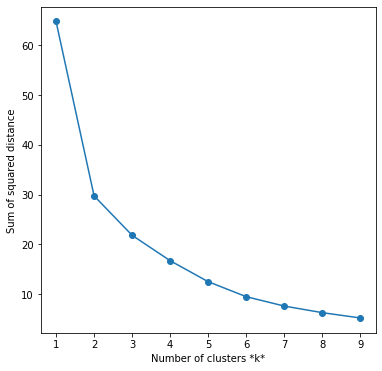

In [214]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(thai_res_nyc_cluster)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

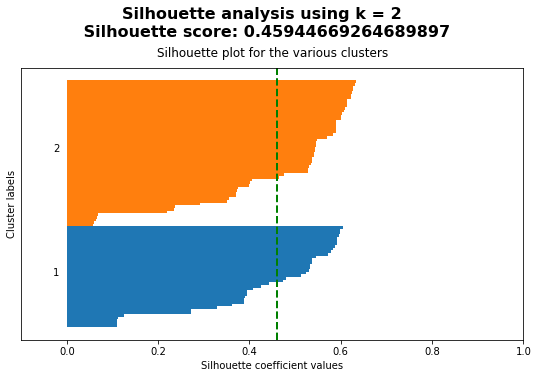

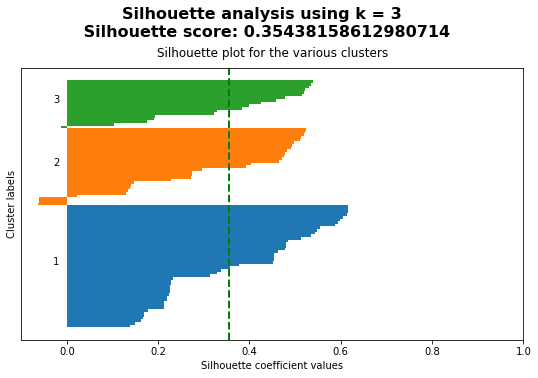

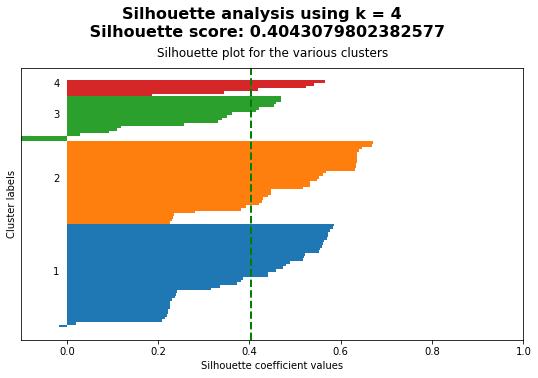

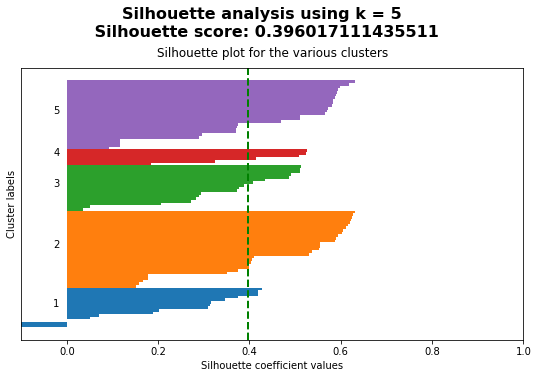

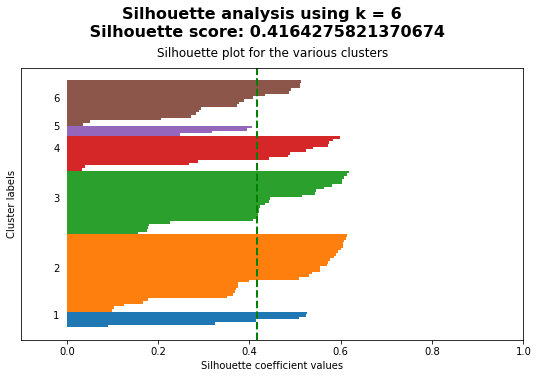

In [216]:
from sklearn.metrics import silhouette_samples

for i, k in enumerate([2, 3, 4, 5, 6]):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(thai_res_nyc_cluster)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(thai_res_nyc_cluster, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    plt.suptitle(f'Silhouette analysis using k = {k} \n Silhouette score: {avg_score}',
                 fontsize=16, fontweight='semibold', y=1.05);